# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data.

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies.

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [59]:
%pip install --upgrade plotly

###  Import Statements


In [60]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [61]:
pd.options.display.max_rows = 100

In [62]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [63]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`.

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [64]:
print(f"What shape in our data ? The data has {df_data.shape} shape")
print(f"How many rows and columns does it have ? It does have {df_data.shape} rows and columns")
print(f"What are the column names ? The data column names are : {df_data.columns}")
print(f"Are there any NaN values or Duplicates ? There are {df_data.isna().values.any()} any NaN value and there are {df_data.duplicated().values.any()} any duplicates data")

What shape in our data ? The data has (2000, 96) shape
How many rows and columns does it have ? It does have (2000, 96) rows and columns
What are the column names ? The data column names are : Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', '

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [65]:
df_data

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,NaN,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2456,14.00,8,7.87,1,0,1982,29,19.00,"6,000.00",...,1,1,0,0,0,0,1,0,0,0
1996,1119,14.83,18,1.92,1,0,1983,28,28.00,"50,000.00",...,1,1,0,0,0,0,1,0,0,0
1997,3561,35.88,18,2.67,1,0,1984,27,29.00,"77,610.00",...,1,0,0,1,0,0,0,1,0,0
1998,5980,25.48,16,4.71,1,0,1982,29,23.00,"69,300.00",...,0,0,0,1,0,0,1,0,0,0


In [66]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2000 non-null   int64  
 1   EARNINGS  2000 non-null   float64
 2   S         2000 non-null   int64  
 3   EXP       2000 non-null   float64
 4   FEMALE    2000 non-null   int64  
 5   MALE      2000 non-null   int64  
 6   BYEAR     2000 non-null   int64  
 7   AGE       2000 non-null   int64  
 8   AGEMBTH   1956 non-null   float64
 9   HHINC97   1630 non-null   float64
 10  POVRAT97  1627 non-null   float64
 11  HHBMBF    2000 non-null   int64  
 12  HHBMOF    2000 non-null   int64  
 13  HHOMBF    2000 non-null   int64  
 14  HHBMONLY  2000 non-null   int64  
 15  HHBFONLY  2000 non-null   int64  
 16  HHOTHER   2000 non-null   int64  
 17  MSA97NO   2000 non-null   int64  
 18  MSA97NCC  2000 non-null   int64  
 19  MSA97CC   2000 non-null   int64  
 20  MSA97NK   2000 non-null   int6

In [67]:
df_data.isna().sum()

ID             0
EARNINGS       0
S              0
EXP            0
FEMALE         0
MALE           0
BYEAR          0
AGE            0
AGEMBTH       44
HHINC97      370
POVRAT97     373
HHBMBF         0
HHBMOF         0
HHOMBF         0
HHBMONLY       0
HHBFONLY       0
HHOTHER        0
MSA97NO        0
MSA97NCC       0
MSA97CC        0
MSA97NK        0
ETHBLACK       0
ETHHISP        0
ETHWHITE       0
EDUCPROF       0
EDUCPHD        0
EDUCMAST       0
EDUCBA         0
EDUCAA         0
EDUCHSD        0
EDUCGED        0
EDUCDO         0
PRMONM       879
PRMONF      1073
PRMSTYUN     533
PRMSTYPE     533
PRMSTYAN     533
PRMSTYAE     533
PRFSTYUN     790
PRFSTYPE     790
PRFSTYAN     790
PRFSTYAE     790
SINGLE         0
MARRIED        0
COHABIT        0
OTHSING        0
FAITHN         0
FAITHP         0
FAITHC         0
FAITHJ         0
FAITHO         0
FAITHM         0
ASVABAR        0
ASVABWK        0
ASVABPC        0
ASVABMK        0
ASVABNO        0
ASVABCS        0
ASVABC        

In [68]:
# To know the value of each columns
for col in df_data.columns:
    print(col,len(df_data[col].unique()),df_data[col].unique())

ID 1487 [4275 4328 8763 ... 4550 3779 2456]
EARNINGS 677 [ 18.5   19.23  39.05  16.8   36.06  13.14  10.    12.79  20.19  25.48
  19.65   8.    17.46  31.73  27.27  16.92  50.48  49.02  25.6   20.
  65.    12.35  32.52  21.31  15.    13.74  38.46  12.    14.8   11.65
   9.75  15.5    7.25  22.    12.5   28.52  38.    17.5    7.5   12.94
  27.    18.14  35.98   9.62  41.15   5.88  11.    26.42  24.13  19.54
  11.25  12.25  16.73  13.5   40.    10.64  34.88   8.5   22.5   21.79
  29.07  16.67  13.29  13.46   7.69  11.5   12.89  30.23  18.36  22.67
  33.33  34.4   17.12  19.    25.21  79.17  10.5   14.5   31.54  15.7
  18.23  28.57   9.5   29.09   8.81  35.39  31.25  11.54  35.58  36.
  13.33  14.19  96.15  22.81  15.63  12.78  16.    23.72  16.24   3.15
  39.42  17.2   21.15  16.35  50.96  17.31   9.35 132.89   9.1   27.65
  10.14  18.    19.05  21.    15.38  33.17  14.18  10.81  11.63  13.21
  28.37  24.8   14.1   34.07  19.66  12.86  22.65  25.64  14.    28.
  21.22  27.89  47.4   11.3

In [69]:
# df_data_cleaner = df_data.fillna(df_data.mean())

In [70]:
df_data_cleaner = df_data.drop_duplicates()
df_data_cleaner

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,NaN,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2400,9.00,12,10.83,1,0,1982,29,29.00,"73,100.00",...,0,0,0,1,0,0,0,1,0,0
1989,3018,8.00,12,9.37,1,0,1982,29,23.00,"66,300.00",...,1,0,1,0,0,0,1,0,0,0
1991,4550,8.57,17,6.29,1,0,1984,27,25.00,"76,300.00",...,0,0,0,0,1,0,1,0,0,0
1994,3779,9.33,12,9.12,1,0,1984,27,22.00,NaN,...,1,0,0,1,0,0,1,0,0,0


In [71]:
df_data_cleaner.isnull().sum()

ID            0
EARNINGS      0
S             0
EXP           0
FEMALE        0
MALE          0
BYEAR         0
AGE           0
AGEMBTH      34
HHINC97     282
POVRAT97    284
HHBMBF        0
HHBMOF        0
HHOMBF        0
HHBMONLY      0
HHBFONLY      0
HHOTHER       0
MSA97NO       0
MSA97NCC      0
MSA97CC       0
MSA97NK       0
ETHBLACK      0
ETHHISP       0
ETHWHITE      0
EDUCPROF      0
EDUCPHD       0
EDUCMAST      0
EDUCBA        0
EDUCAA        0
EDUCHSD       0
EDUCGED       0
EDUCDO        0
PRMONM      636
PRMONF      789
PRMSTYUN    387
PRMSTYPE    387
PRMSTYAN    387
PRMSTYAE    387
PRFSTYUN    583
PRFSTYPE    583
PRFSTYAN    583
PRFSTYAE    583
SINGLE        0
MARRIED       0
COHABIT       0
OTHSING       0
FAITHN        0
FAITHP        0
FAITHC        0
FAITHJ        0
FAITHO        0
FAITHM        0
ASVABAR       0
ASVABWK       0
ASVABPC       0
ASVABMK       0
ASVABNO       0
ASVABCS       0
ASVABC        0
ASVABC4       0
VERBAL        0
ASVABMV       0
HEIGHT  

In [72]:
for col in df_data_cleaner.columns:
    print(col,len(df_data_cleaner[col].unique()),df_data_cleaner[col].unique())

ID 1487 [4275 4328 8763 ... 4550 3779 2456]
EARNINGS 677 [ 18.5   19.23  39.05  16.8   36.06  13.14  10.    12.79  20.19  25.48
  19.65   8.    17.46  31.73  27.27  16.92  50.48  49.02  25.6   20.
  65.    12.35  32.52  21.31  15.    13.74  38.46  12.    14.8   11.65
   9.75  15.5    7.25  22.    12.5   28.52  38.    17.5    7.5   12.94
  27.    18.14  35.98   9.62  41.15   5.88  11.    26.42  24.13  19.54
  11.25  12.25  16.73  13.5   40.    10.64  34.88   8.5   22.5   21.79
  29.07  16.67  13.29  13.46   7.69  11.5   12.89  30.23  18.36  22.67
  33.33  34.4   17.12  19.    25.21  79.17  10.5   14.5   31.54  15.7
  18.23  28.57   9.5   29.09   8.81  35.39  31.25  11.54  35.58  36.
  13.33  14.19  96.15  22.81  15.63  12.78  16.    23.72  16.24   3.15
  39.42  17.2   21.15  16.35  50.96  17.31   9.35 132.89   9.1   27.65
  10.14  18.    19.05  21.    15.38  33.17  14.18  10.81  11.63  13.21
  28.37  24.8   14.1   34.07  19.66  12.86  22.65  25.64  14.    28.
  21.22  27.89  47.4   11.3

In [73]:
# using dropna() will result in data loss around 1000 mark...
# df_data_cleaner = df_data_cleaner.dropna()
# df_data_cleaner

## Descriptive Statistics

In [74]:
df_data.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","1,956.00","1,630.00",...,"2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00"
mean,"3,530.89",18.87,14.58,6.72,0.50,0.50,"1,982.05",28.95,26.42,"58,143.75",...,0.78,0.15,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,"2,023.07",11.95,2.74,2.84,0.50,0.50,1.39,1.39,5.04,"42,745.79",...,0.43,0.36,0.44,0.48,0.42,0.21,0.50,0.49,0.06,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,12.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,825.00",11.54,12.00,4.69,0.00,0.00,"1,981.00",28.00,23.00,"32,000.00",...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,471.50",15.75,15.00,6.63,0.50,0.50,"1,982.00",29.00,26.00,"50,502.00",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,158.25",22.70,16.00,8.70,1.00,1.00,"1,983.00",30.00,30.00,"72,202.50",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,980.00",132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,45.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


In [75]:
df_data_cleaner.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,453.00","1,205.00",...,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00"
mean,"3,547.13",18.81,14.56,6.70,0.49,0.51,"1,982.07",28.93,26.32,"58,310.67",...,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,"2,009.84",12.00,2.77,2.86,0.50,0.50,1.38,1.38,5.08,"43,868.05",...,0.43,0.36,0.44,0.47,0.42,0.21,0.50,0.49,0.04,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,12.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,888.00",11.41,12.00,4.65,0.00,0.00,"1,981.00",28.00,23.00,"32,000.00",...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,474.00",15.75,15.00,6.63,0.00,1.00,"1,982.00",29.00,26.00,"50,500.00",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,160.50",22.60,16.00,8.71,1.00,1.00,"1,983.00",30.00,30.00,"72,000.00",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,980.00",132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,45.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


## Visualise the Features

Text(5.069444444444445, 0.5, 'COUNT')

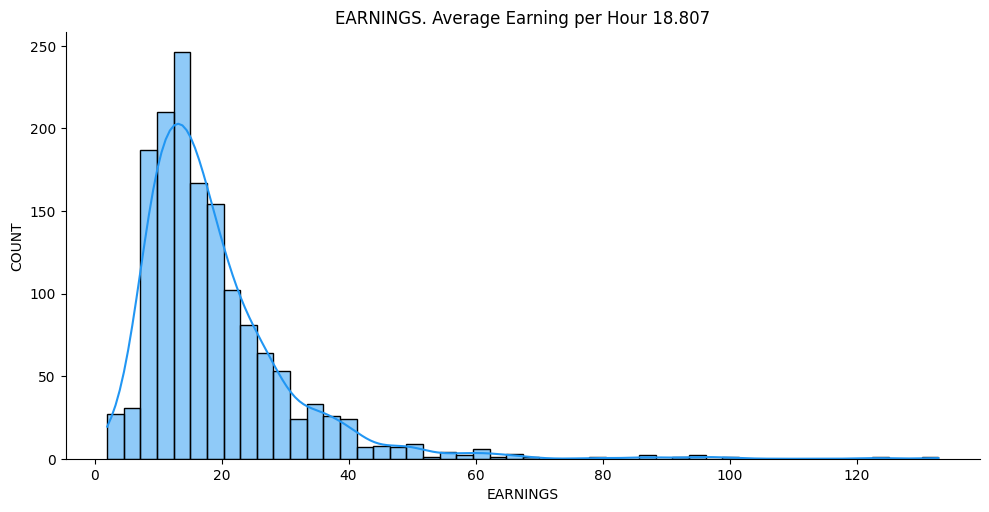

In [76]:
sns.displot(data=df_data_cleaner["EARNINGS"],
            bins=50,
            aspect=2,
            kde=True,
            color="#2196f3")
plt.title(f"EARNINGS. Average Earning per Hour {(df_data_cleaner.EARNINGS.mean()):.6}")
plt.xlabel("EARNINGS")
plt.ylabel("COUNT")

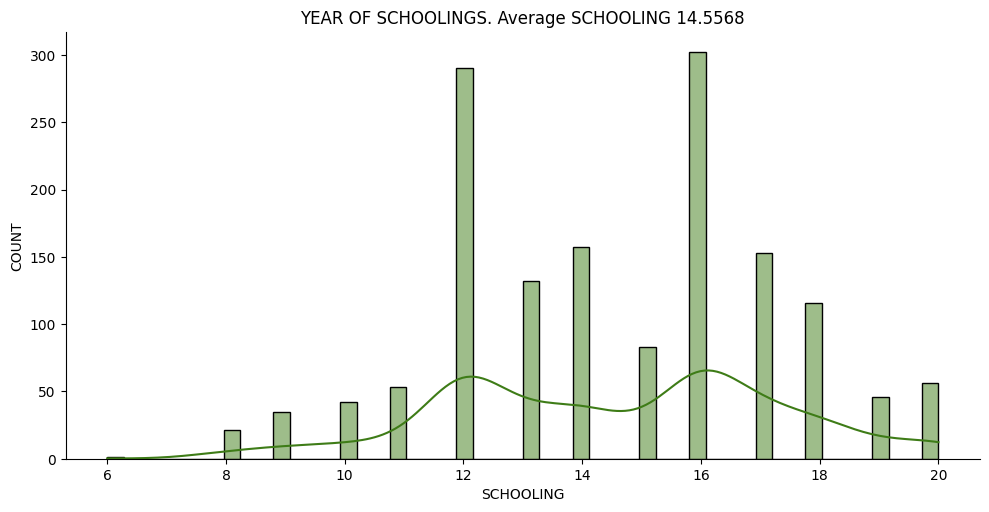

In [77]:
sns.displot(data=df_data_cleaner["S"],
            bins=50,
            aspect=2,
            kde=True,
            color="#3E7C17")
plt.title(f"YEAR OF SCHOOLINGS. Average SCHOOLING {(df_data_cleaner.S.mean()):.6}")
plt.xlabel("SCHOOLING")
plt.ylabel("COUNT")
plt.show()

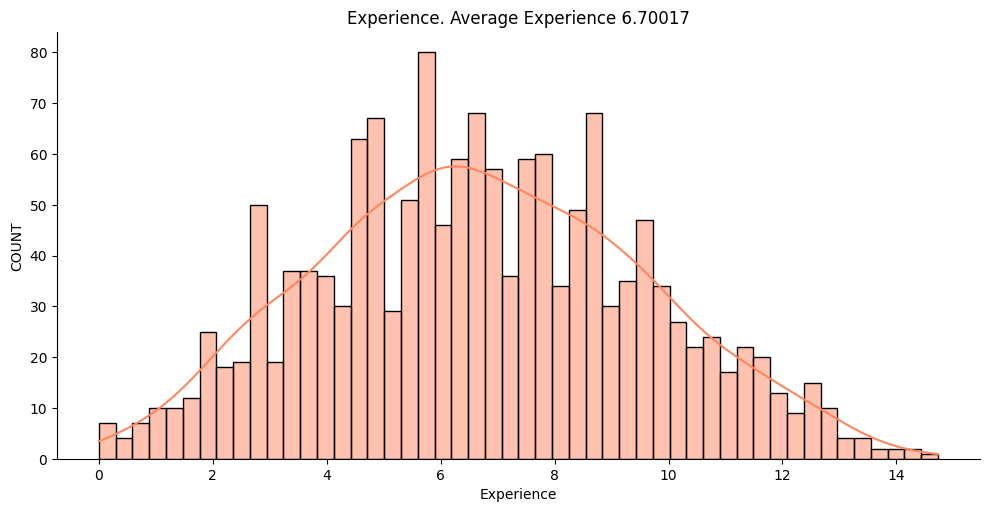

In [78]:
sns.displot(data=df_data_cleaner["EXP"],
            bins=50,
            aspect=2,
            kde=True,
            color="#FF865E")
plt.title(f"Experience. Average Experience {(df_data_cleaner.EXP.mean()):.6}")
plt.xlabel("Experience")
plt.ylabel("COUNT")
plt.show()

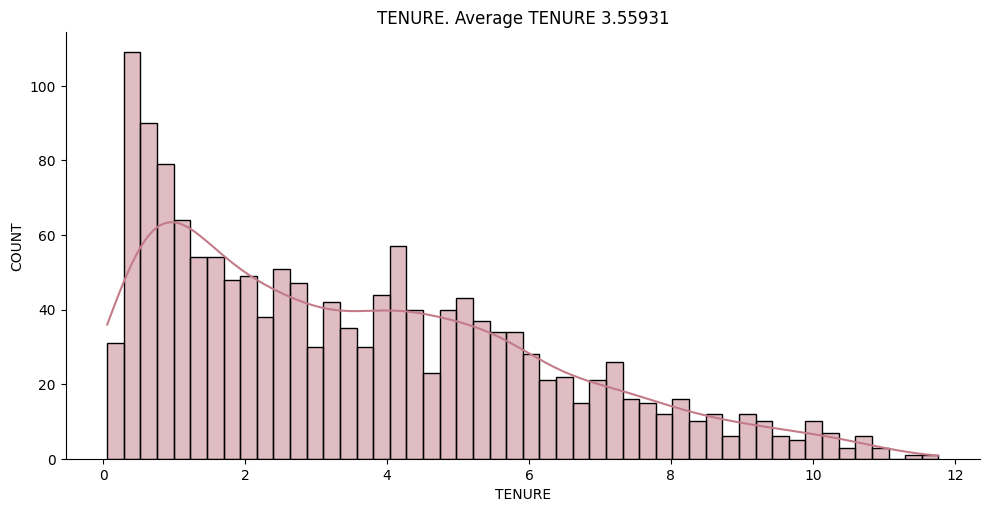

In [79]:
sns.displot(data=df_data_cleaner["TENURE"],
            bins=50,
            aspect=2,
            kde=True,
            color="#C37B89")
plt.title(f"TENURE. Average TENURE {(df_data_cleaner.TENURE.mean()):.6}")
plt.xlabel("TENURE")
plt.ylabel("COUNT")
plt.show()

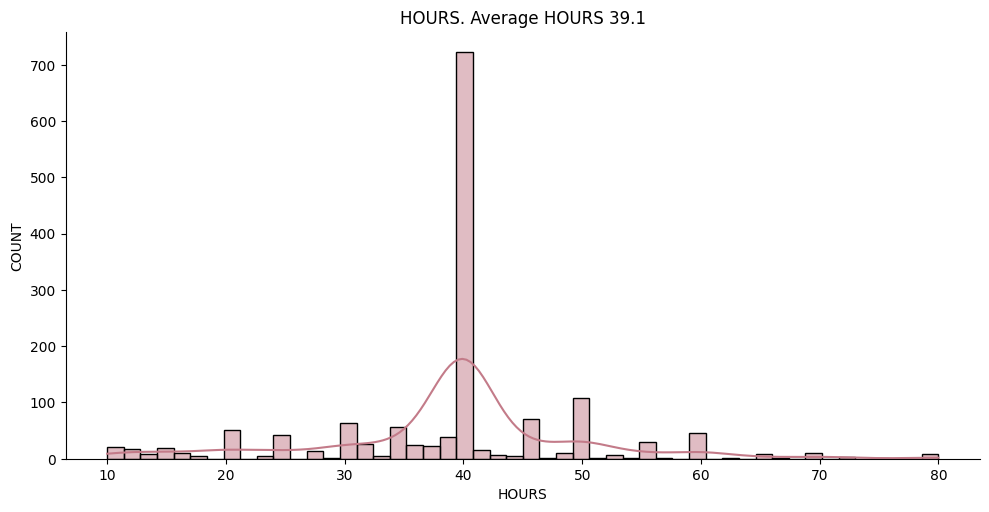

In [80]:
sns.displot(data=df_data_cleaner["HOURS"],
            bins=50,
            aspect=2,
            kde=True,
            color="#C37B89")
plt.title(f"HOURS. Average HOURS {(df_data_cleaner.HOURS.mean()):.3}")
plt.xlabel("HOURS")
plt.ylabel("COUNT")
plt.show()

In [81]:
age = df_data_cleaner['AGE'].value_counts()
bar = px.bar(x=age.index,
            y=age.values,
            color_continuous_scale=px.colors.sequential.haline,
            title="Overall Age")
bar.update_layout(xaxis_title="Age",
                 yaxis_title="Count",
                 coloraxis_showscale=False)
bar.show()

In [82]:
# sns.pairplot(df_data_cleaner, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})

# plt.show()

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [83]:
target = df_data_cleaner["EARNINGS"]
features = df_data_cleaner.drop("EARNINGS", axis=1)

X_train, X_test, y_train, y_test = train_test_split(features,
                                                   target,
                                                   test_size=0.2,
                                                   random_state=10,
                                                   )

In [84]:
X_train

,ID,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,POVRAT97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
179,3146,14,9.60,0,1,1982,29,28.00,"78,109.00",491.00,...,0,0,1,0,0,0,1,0,0,0
142,1360,16,7.60,0,1,1981,30,32.00,"103,750.00",652.00,...,1,0,0,1,0,0,0,1,0,0
1626,6576,10,6.33,0,1,1984,27,20.00,"23,652.00",219.00,...,1,0,0,0,1,0,0,1,0,0
707,511,12,13.54,0,1,1980,31,16.00,NaN,NaN,...,1,0,0,1,0,0,1,0,0,0
1288,3527,18,4.67,1,0,1983,28,24.00,"53,750.00",338.00,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,1840,17,5.77,1,0,1982,29,28.00,"37,750.00",180.00,...,1,0,1,0,0,0,0,1,0,0
1660,2229,9,10.27,0,1,1983,28,25.00,"62,300.00",333.00,...,1,1,0,0,0,0,1,0,0,0
527,997,14,9.71,0,1,1980,31,35.00,"63,050.00",499.00,...,1,0,0,0,1,0,0,1,0,0
1263,996,16,5.25,1,0,1981,30,25.00,"127,000.00",587.00,...,1,0,0,0,1,0,0,1,0,0


In [85]:
y_train

179     5.76
142    15.38
1626   20.00
707    17.78
1288   16.00
        ... 
1762   45.67
1660   19.50
527    26.00
1263   40.00
1541   26.44
Name: EARNINGS, Length: 1189, dtype: float64

# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data?

In [86]:
regression = LinearRegression()

In [87]:
X = pd.DataFrame(X_train, columns=["S"])
y = pd.DataFrame(y_train, columns=["EARNINGS"])

regression.fit(X,y)

LinearRegression()

In [88]:
print(f"The slope coefficient is : {regression.coef_}")
print(f"The intercept is : {regression.intercept_}")
print(f"The r-square is : {regression.score(X,y)}")

The slope coefficient is : [[1.21917798]]
The intercept is : [1.02890741]
The r-square is : 0.08085050566060015


For simple linear regression our R-Square is 0,0808

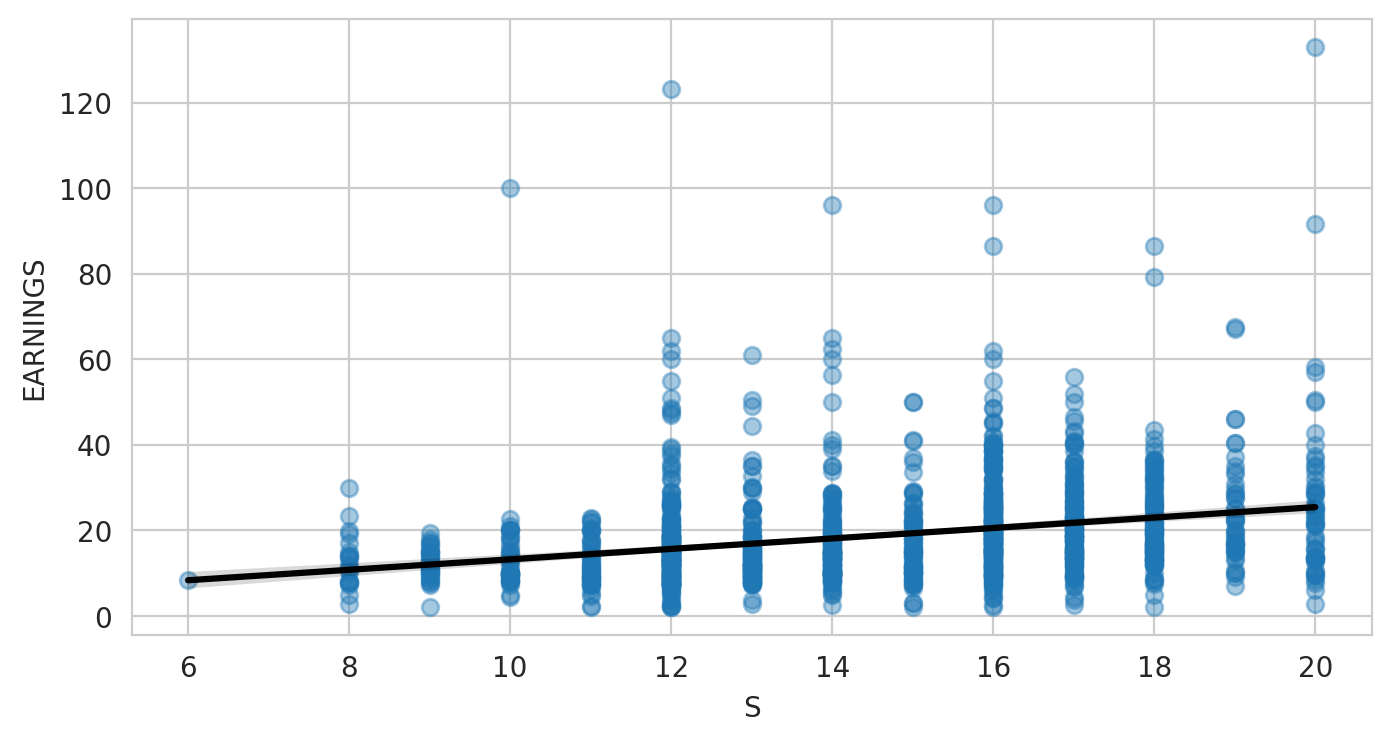

In [89]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("whitegrid"):
    sns.regplot(data=df_data_cleaner,
               x="S",
               y="EARNINGS",
               scatter_kws={"alpha":0.4},
               line_kws={"color":"black"})

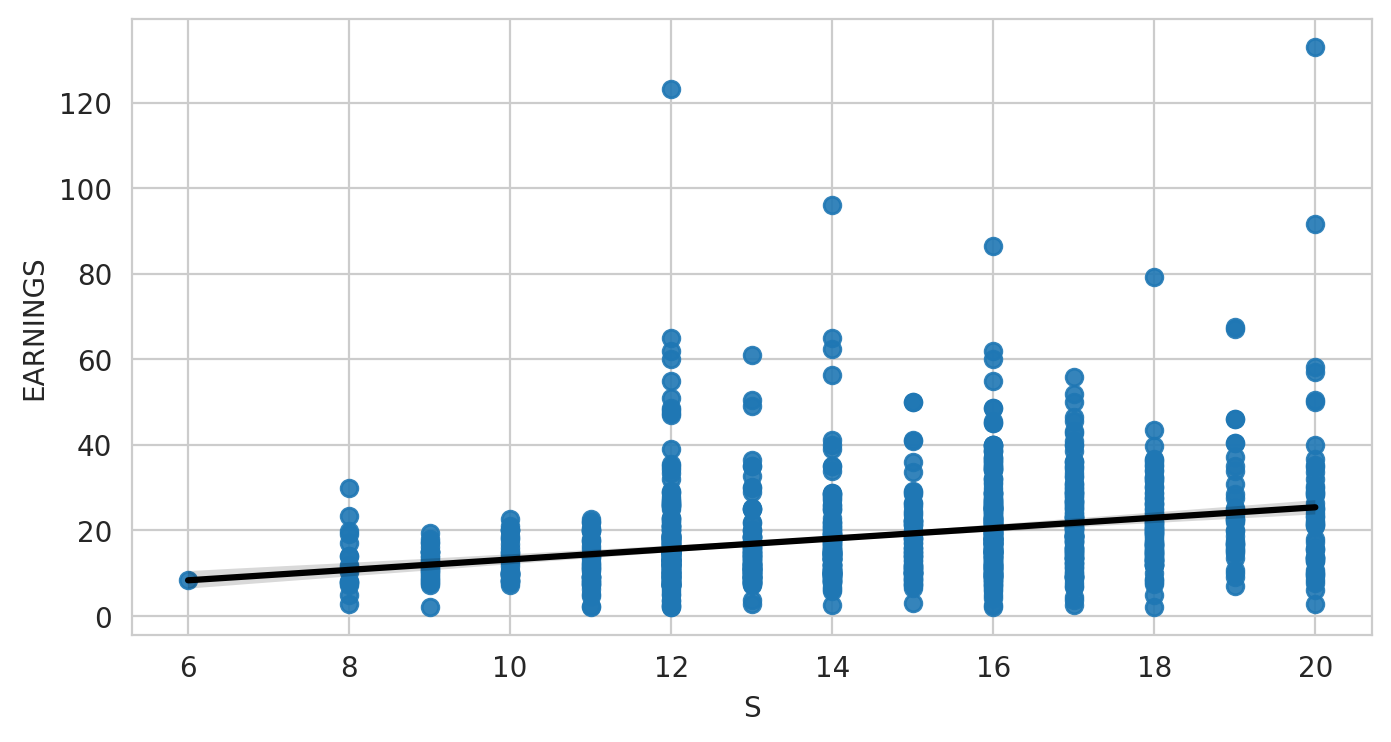

In [90]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("whitegrid"):
    sns.regplot(
               x=X,
               y=y,
               scatter_kws={"alpha":0.9},
               line_kws={"color":"black"})

### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative).

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [91]:
print(f"The slope coefficient is : {regression.coef_}")
print(f"The intercept is : {regression.intercept_}")
print(f"The r-square is : {regression.score(X,y)}")

The slope coefficient is : [[1.21917798]]
The intercept is : [1.02890741]
The r-square is : 0.08085050566060015


In [92]:
schooling = regression.intercept_[0] + regression.coef_[0,0] * 13
print(f'How many dollar can one expect to earn for additional one year schoolin ? ${schooling:.4}')

How many dollar can one expect to earn for additional one year schoolin ? $16.88


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [93]:
predict_value_x = regression.predict(X)
residuals_ = y - predict_value_x

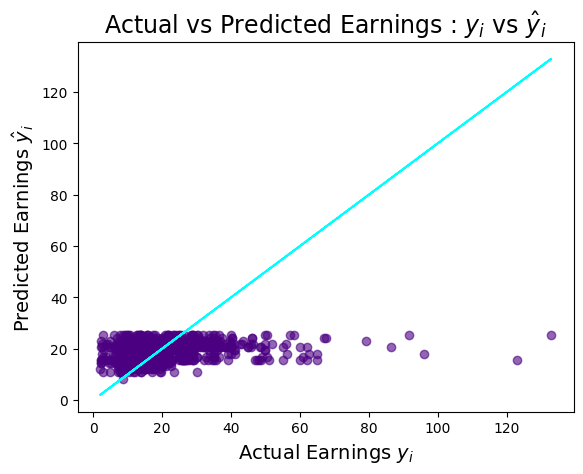

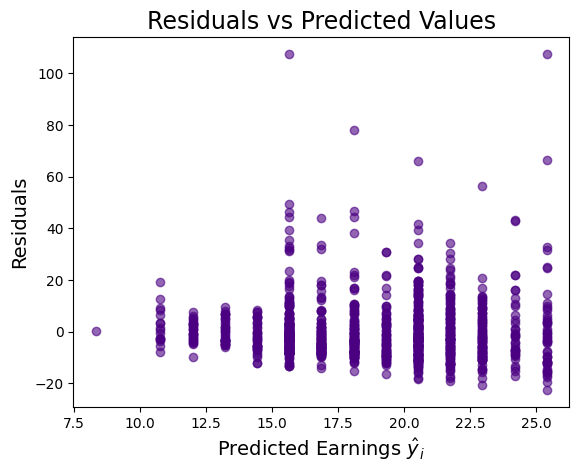

In [94]:
# Original Regression of Actual and Predicted Value
plt.figure(dpi=100)
plt.scatter(x=y, y=predict_value_x, c="indigo", alpha=0.6)
plt.plot(y, y, color="cyan")
plt.title("Actual vs Predicted Earnings : $y _i$ vs $\hat y_i$", fontsize=17)
plt.xlabel("Actual Earnings $y _i$", fontsize=14)
plt.ylabel("Predicted Earnings $\hat y_i$", fontsize=14)
plt.show()

# Residuals vs Predicted Values
plt.figure(dpi=100)
plt.scatter(x=predict_value_x, y=residuals_, c="indigo", alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Earnings $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

In [95]:
residual_mean = round(residuals_.mean(),2)
residual_skew = round(residuals_.skew(),2)

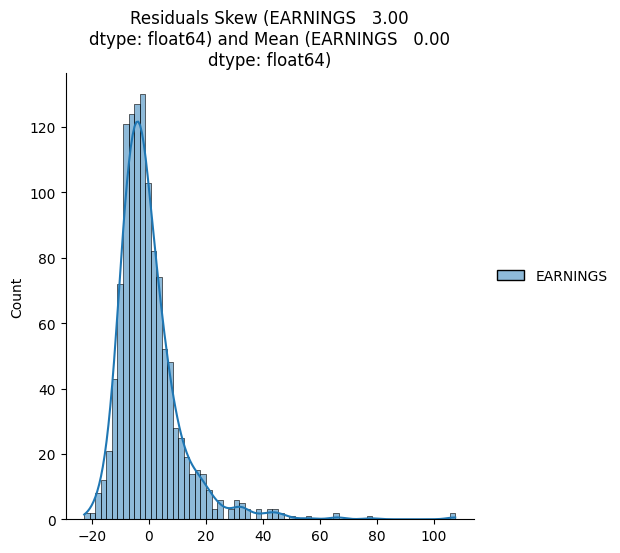

In [96]:
sns.displot(residuals_, kde=True, color="indigo")
plt.title(f'Residuals Skew ({residual_skew}) and Mean ({residual_mean})')
plt.show()

The residual skewness is 3.00 and there could be some room for improvement here!!

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data?

In [97]:
y_target = df_data_cleaner['EARNINGS']
X_features = df_data_cleaner[["S","EXP"]]

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_features, y_target,
                                                                   test_size=0.2,
                                                                   random_state=10)

In [98]:
new_regr= LinearRegression()
new_regr.fit(X_train_new, y_train_new)
new_r_squared = new_regr.score(X_train_new, y_train_new)

new_predict = new_regr.predict(X_train_new)
new_residual = y_train_new - new_predict
print(f"The new R Squared is {new_r_squared}")

The new R Squared is 0.11705510273476538


Before we only used "Schoolings" as a feature for our Simple Linear Regression and we got R-squared is 0,0808. Now we add new feature to our regression, the new feature is "Experience" and we got R-squared is 0,117.

<span>We don't use our transform data</span>

### Evaluate the Coefficients of the Model

In [99]:
regr_coef = pd.DataFrame(data=new_regr.coef_, index=X_train_new.columns, columns=["Coeficient"])
regr_coef

,Coeficient
S,1.79
EXP,0.98


### Analyse the Estimated Values & Regression Residuals

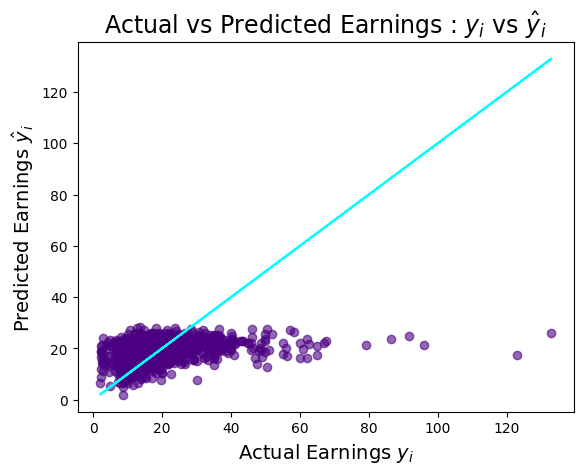

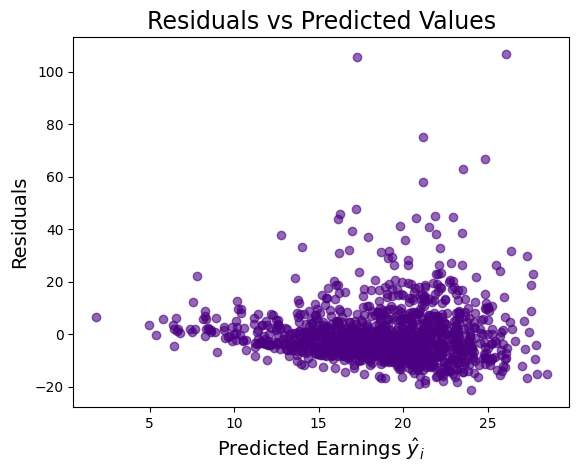

In [100]:
# Original Regression of Actual and Predicted Value
plt.figure(dpi=100)
plt.scatter(x=y_train_new, y=new_predict, c="indigo", alpha=0.6)
plt.plot(y_train_new, y_train_new, color="cyan")
plt.title("Actual vs Predicted Earnings : $y _i$ vs $\hat y_i$", fontsize=17)
plt.xlabel("Actual Earnings $y _i$", fontsize=14)
plt.ylabel("Predicted Earnings $\hat y_i$", fontsize=14)
plt.show()

# Residuals vs Predicted Values
plt.figure(dpi=100)
plt.scatter(x=new_predict, y=new_residual, c="indigo", alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Earnings $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [101]:
average_vals = X_features.mean().values
stats = pd.DataFrame(data=average_vals.reshape(1, len(X_features.columns)),
                              columns=X_features.columns)
stats

,S,EXP
0,14.56,6.70


In [102]:
new_estimate = new_regr.predict(stats)[0]
print(f"The New Earnings per Hour is ${new_estimate:.3}")

The New Earnings per Hour is $18.8


In [103]:
stats["S"]=16
stats["EXP"]=5
stats

,S,EXP
0,16,5


In [104]:
new_estimate = new_regr.predict(stats)[0]
print(f"The New Earnings per Hour is ${new_estimate:.3}")

The New Earnings per Hour is $19.7


# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings?

In [105]:
# Used the df_data_cleaner in this evluate, and don't forget there is still nan value
# So it's much better if we impute the nan value rather drop the columns value
# In this project I would like use interpolate, cause is new for me and you could use mean or median of the data



df_data_cleaner_v2 = df_data_cleaner.interpolate()
# df_data_cleaner_v2.isnull().sum()

In [106]:
target_cleaner = df_data_cleaner_v2["EARNINGS"]
features_cleaner = df_data_cleaner_v2.drop("EARNINGS", axis=1)

X_train_cleaner, X_test_cleaner, y_train_cleaner, y_test_cleaner = train_test_split(features_cleaner,
                                                   target_cleaner,
                                                   test_size=0.2,
                                                   random_state=10,
                                                   )

regression.fit(X_train_cleaner, y_train_cleaner)
print(f"The slope coefficient is : {regression.coef_}")
print(f"The intercept is : {regression.intercept_}")
print(f"The r-square is : {regression.score(X_train_cleaner,y_train_cleaner)}")

The slope coefficient is : [-1.48808511e-04  1.20440919e+00  9.08639096e-01  1.34837419e+01
  1.55034133e+01 -1.83203658e+01 -1.86473561e+01 -6.56831241e-02
  4.60139970e-05 -4.01335273e-03  2.80356824e+00  3.12114259e+00
  1.78925820e+00  3.18739499e+00  3.25066640e+00  4.23152792e+00
 -2.62534922e+00 -1.51656651e+00 -2.56330188e+00 -4.04558284e+00
 -1.68450627e+00 -7.35036002e-01 -1.35870087e+00  1.08399536e+01
  5.57654422e+00 -1.98814301e-01 -2.51882091e+00 -2.90031536e+00
 -3.33803487e+00 -3.55011850e+00 -2.66130224e+00 -5.00005027e-02
  1.12460996e-01 -4.17333859e-01 -6.71257997e-01 -3.87771647e-01
 -4.10154891e-01 -2.78101463e+00 -8.03923974e-01 -2.00030081e+00
 -2.28508699e+00 -6.05438337e-01  5.12468475e-01 -7.38369078e-01
 -7.87634420e-01 -5.16062697e-01 -6.30805069e-01 -7.93286705e-01
 -5.30719093e-01 -1.66322255e+00 -9.95558702e-01  5.57121757e+04
  2.32101773e+06  2.32101785e+06  1.33284451e+06  1.75362151e-01
 -1.12163739e+00  2.32386756e+06 -4.76303257e+06 -3.05046084e+0

Our first r-square is 0,3088

In [107]:
regr_coef = pd.DataFrame(data=regression.coef_, index=X_train_cleaner.columns, columns=["Coeficient"])
regr_coef

predict_value = regression.predict(X_train_cleaner)
residuals = y_train_cleaner - predict_value

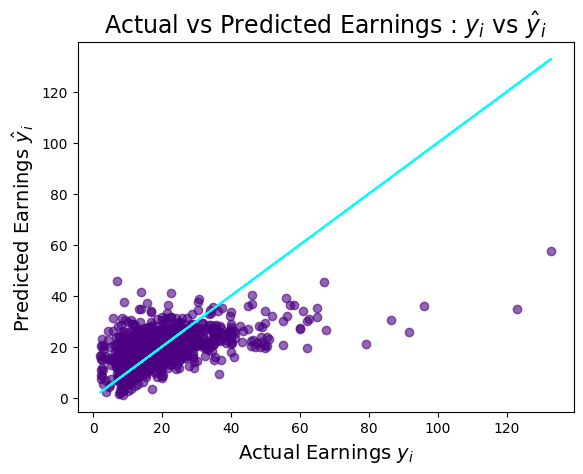

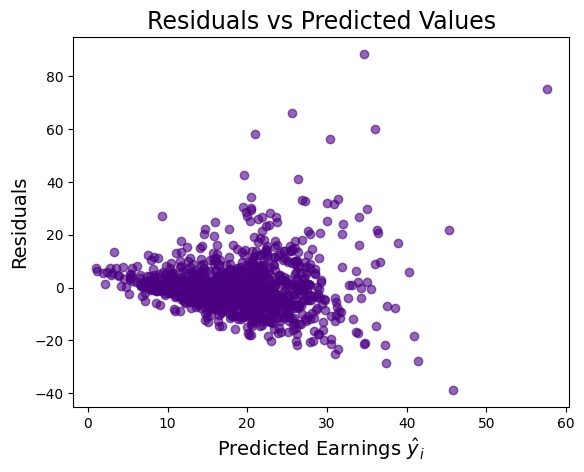

In [108]:
# Original Regression of Actual and Predicted Value
plt.figure(dpi=100)
plt.scatter(x=y_train_cleaner, y=predict_value, c="indigo", alpha=0.6)
plt.plot(y_train_cleaner, y_train_cleaner, color="cyan")
plt.title("Actual vs Predicted Earnings : $y _i$ vs $\hat y_i$", fontsize=17)
plt.xlabel("Actual Earnings $y _i$", fontsize=14)
plt.ylabel("Predicted Earnings $\hat y_i$", fontsize=14)
plt.show()

# Residuals vs Predicted Values
plt.figure(dpi=100)
plt.scatter(x=predict_value, y=residuals, c="indigo", alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Earnings $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

In [109]:
residual_mean = round(residuals.mean(),2)
residual_skew = round(residuals.skew(),2)

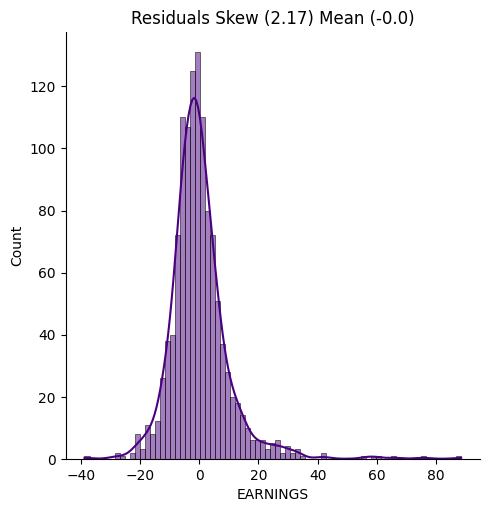

In [110]:
sns.displot(residuals, kde=True, color="indigo")
plt.title(f'Residuals Skew ({residual_skew}) Mean ({residual_mean})')
plt.show()

The residual skewness is 2.17 and there could be some room for improvement here!!

## Let's try to Transform our data used np.log

Text(5.069444444444445, 0.5, 'COUNT')

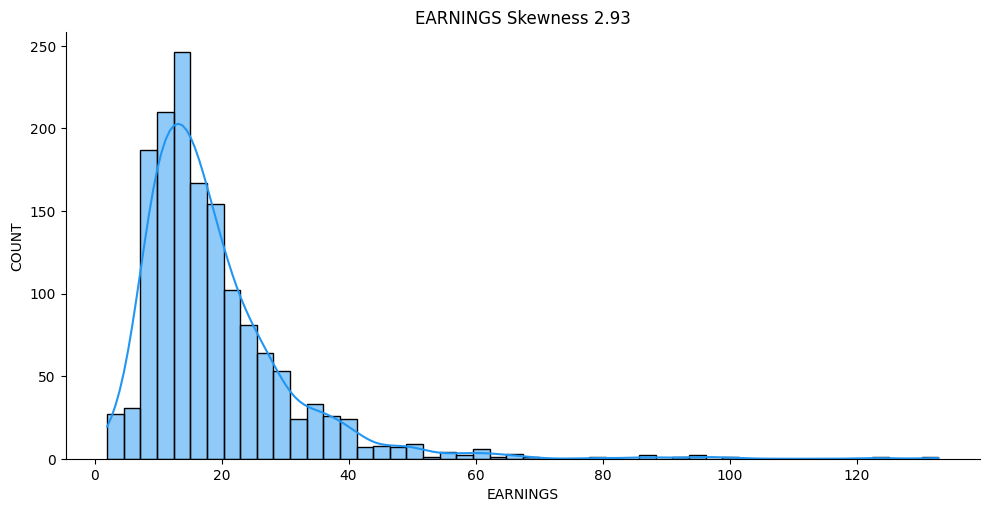

In [111]:
target_skew = df_data_cleaner_v2["EARNINGS"].skew()
sns.displot(data=df_data_cleaner_v2["EARNINGS"],
            bins=50,
            aspect=2,
            kde=True,
            color="#2196f3")
plt.title(f"EARNINGS Skewness {target_skew:.3}")
plt.xlabel("EARNINGS")
plt.ylabel("COUNT")

Text(5.069444444444445, 0.5, 'COUNT')

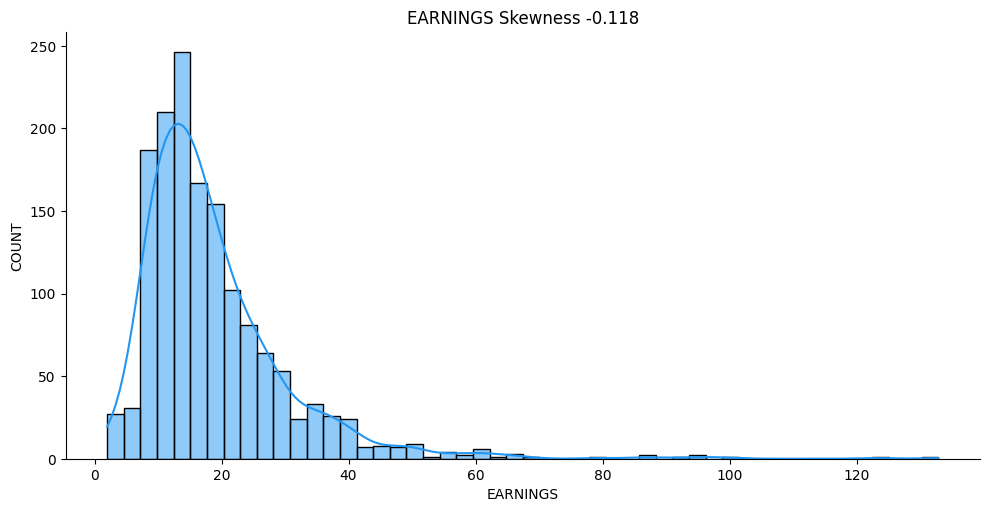

In [112]:
y_log = np.log(df_data_cleaner_v2['EARNINGS']).skew()
sns.displot(data=df_data_cleaner_v2["EARNINGS"],
            bins=50,
            aspect=2,
            kde=True,
            color="#2196f3")
plt.title(f"EARNINGS Skewness {y_log:.3}")
plt.xlabel("EARNINGS")
plt.ylabel("COUNT")

<p> Look at the figure before we transform our data, we got skewness is 2.93 and it's really big value and this will bring bias to our data. So we decided to transform our data using np.log and we got the skewness is near 0. This makes them a good candidate for use in our linear model. Perhaps using log earnings will improve our regression's r-squared and our model's residuals.
</p>

In [113]:
new_target = np.log(df_data_cleaner_v2['EARNINGS'])
same_feature = df_data_cleaner_v2.drop("EARNINGS", axis=1)

X_train_new, X_test_new, y_log_train, y_log_test = train_test_split(same_feature,
                                                                   new_target,
                                                                   test_size=0.2,
                                                                   random_state=10)


In [114]:
new_regr= LinearRegression()
new_regr.fit(X_train_new, y_log_train)
new_r_squared = new_regr.score(X_train_new, y_log_train)

new_predict = new_regr.predict(X_train_new)
new_residual = y_log_train- new_predict
print(f"The new R Squared is {new_r_squared}")

The new R Squared is 0.3419015837121546


Our first R-square is 0,3088, and now our R-Square is 0,3419

# Try to predict used all feature we have

In [115]:
average_vals = same_feature.mean().values
stats = pd.DataFrame(data=average_vals.reshape(1, len(same_feature.columns)),
                              columns=same_feature.columns)
stats

,ID,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,POVRAT97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,"3,547.13",14.56,6.70,0.49,0.51,"1,982.07",28.93,26.32,"58,003.51",359.92,...,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00


In [116]:
new_estimate = new_regr.predict(stats)[0]
print(f"The New Earnings per Hour is ${new_estimate:.3}")

The New Earnings per Hour is $2.78


As we see, not all columns could be a feature for example ID is not related to our feature so it's must drop before we predict the value. This I used to remain myself, to remember choose a good feature